In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [3]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [4]:
print(y_test.shape)
print(y_train.shape)
print(X_test.shape)
print(X_train.shape)

(10000, 1)
(50000, 1)
(10000, 32, 32, 3)
(50000, 32, 32, 3)


In [5]:
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [6]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
    
    ])

In [9]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4579 - accuracy: 0.4712
Epoch 2/5
1563/1563 [==============================] - 40s 25ms/step - loss: 1.0890 - accuracy: 0.6154
Epoch 3/5
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9340 - accuracy: 0.6713
Epoch 4/5
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8256 - accuracy: 0.7115
Epoch 5/5
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7404 - accuracy: 0.7408


In [11]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.8763 - accuracy: 0.7030


[0.8763060569763184, 0.703000009059906]

In [12]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[2.53741769e-03, 4.53986926e-03, 1.41119910e-03, 2.69496262e-01,
        1.01832746e-04, 6.80935290e-03, 1.95079688e-02, 7.94072475e-05,
        6.92365944e-01, 3.15076043e-03],
       [4.19894187e-03, 2.73665995e-03, 1.10492458e-07, 5.72425378e-08,
        3.08350074e-08, 7.61905117e-09, 8.35570169e-10, 2.53071306e-07,
        9.92980540e-01, 8.34431921e-05],
       [6.17841557e-02, 2.58057527e-02, 3.52935458e-04, 8.27594136e-04,
        2.04753978e-05, 9.88213869e-05, 2.05902339e-04, 1.26520143e-04,
        8.92453432e-01, 1.83244199e-02],
       [4.66509551e-01, 5.15796710e-04, 2.22794013e-03, 1.98241579e-03,
        1.75724539e-03, 3.48303256e-05, 4.28131934e-05, 3.17851045e-05,
        5.26650548e-01, 2.47104268e-04],
       [4.42838937e-05, 9.39411548e-05, 7.71654909e-03, 1.24973822e-02,
        5.94037652e-01, 2.16645375e-03, 3.83179992e-01, 1.10592344e-04,
        1.46986175e-04, 6.24561653e-06]], dtype=float32)

In [13]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[8, 8, 8, 8, 4]

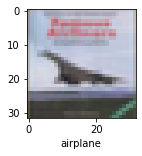

In [14]:
plot_sample(X_test, y_test,3)

In [15]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=np.array(y_classes))
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[735,  20,  29,   5,  11,   2,  13,   8, 153,  24],
       [ 22, 810,   2,   5,   1,   1,   6,   2,  62,  89],
       [ 84,   8, 536,  61,  96,  37,  83,  34,  40,  21],
       [ 27,   8,  55, 481,  70, 103, 113,  46,  53,  44],
       [ 27,  13,  60,  48, 611,  16,  74,  83,  40,  28],
       [ 23,   5,  52, 171,  47, 529,  55,  70,  22,  26],
       [ 10,  11,  31,  27,  22,   7, 841,   9,  22,  20],
       [ 25,   2,  20,  36,  54,  39,  17, 757,  10,  40],
       [ 48,  17,   2,   7,   2,   1,   2,   3, 896,  22],
       [ 31,  63,   3,   5,   2,   1,   9,  11,  41, 834]])>

Text(69.0, 0.5, 'Truth')

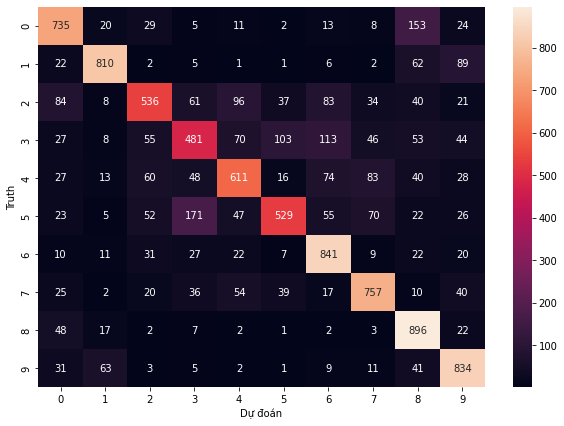

In [16]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')